# 데이터 분석
## - 한글 형태소 분석
## - 워드클라우드
## - 의미망분석

# 한글 형태소 분석

In [47]:
!pip install jpype
!pip install konlpy

  Could not find a version that satisfies the requirement jpype (from versions: )
No matching distribution found for jpype


## 만약 jpype 에러가 발생하면 다음 절차를 따르시면 됩니다. 

    1. JAVA JDK 설치
    - http://www.oracle.com/technetwork/java/javase/downloads/jdk10-downloads-4416644.html
    - JAVA JDK 설치
    - path 설정: http://cwj3688.blogspot.com 참조

    2. JPype 설치
    - https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
    - JPype1-0.6.3-cp36-cp36m-win32.whl 다운로드
        - cp36: Python 3.6 version, _win32: 32비트 Python 
    - 다운로드된 폴더에서 인스톨
        - 일반 환경에서는 Prompt 열고: pip install JPype1-0.6.3-cp36-cp36m-win32.whl
        - 아나콘다 환경에서 할 경우, Anaconda Prompt 열고 pip install JPype1-0.6.3-cp36-cp36m-win32.whl

## 단문에 대한 형태소 분석

In [48]:
from konlpy.tag import Kkma

kkma = Kkma()
print(kkma.pos("한국어 형태소 분석은 재밌습니다"))

from collections import Counter

pos = kkma.pos("한국어 형태소 분석은 재밌습니다")
count = Counter(pos)
print(count)

[('한국어', 'NNG'), ('형태소', 'NNG'), ('분석', 'NNG'), ('은', 'JX'), ('재밌', 'VA'), ('습니다', 'EFN')]
Counter({('한국어', 'NNG'): 1, ('형태소', 'NNG'): 1, ('분석', 'NNG'): 1, ('은', 'JX'): 1, ('재밌', 'VA'): 1, ('습니다', 'EFN'): 1})


## 파일에 대한 형태소 분석

In [49]:
from konlpy.tag import Kkma
from collections import Counter

with open('thirties.txt', encoding='utf-8') as file:
    text = file.read()

kkma = Kkma()

nouns = kkma.nouns(text)
print(nouns)
count = Counter(nouns)
print(count)
print(count.most_common(5))

['서른', '서른즈음', '즈음', '하루', '내', '담배', '연기', '작', '작기만', '기만', '내', '기억', '속', '무', '무얼', '얼', '청춘', '줄', '데', '가슴', '수', '계절', '간', '사랑', '어디', '내가', '조금', '이별', '나']
Counter({'내': 2, '서른': 1, '서른즈음': 1, '즈음': 1, '하루': 1, '담배': 1, '연기': 1, '작': 1, '작기만': 1, '기만': 1, '기억': 1, '속': 1, '무': 1, '무얼': 1, '얼': 1, '청춘': 1, '줄': 1, '데': 1, '가슴': 1, '수': 1, '계절': 1, '간': 1, '사랑': 1, '어디': 1, '내가': 1, '조금': 1, '이별': 1, '나': 1})
[('내', 2), ('서른', 1), ('서른즈음', 1), ('즈음', 1), ('하루', 1)]


## 발의안에 대한 형태소 분석

In [50]:
from collections import Counter
from konlpy.tag import Twitter
from konlpy.corpus import kobill    # Docs from pokr.kr/bill

files_ko = kobill.fileids()         # Get file ids
print(files_ko)

text = kobill.open('1809891.txt').read()
print(text)

t = Twitter()
nouns = t.nouns(text)
count = Counter(nouns)
print(count.most_common(5))

['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']
국가공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9891

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제71조제2항제4호).

- 1 -

법률  제        호

국가공무원법 일부개정법률안

국가공무원법 일부를 다음과 같이 개정한다.

제71조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 

8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”

로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제71조(휴직) ① (생  략)

제71조(휴직) ① (현행과 같음)

  ② 임용권자는 공무원이 다음 
  ② -------------------------

각 호의 어느 하나에 해당하는 

----------------------------

사유로 휴직을 원하면 휴직을 

----------------------------

명할 수 있다. 다만, 제4호의 

-------------

# 워드 클라우드

##  wordcloud 호출에 문제가 발생하면, 
    Anaconda Prompt 열고
    - conda remove pillow
    - pip install pillow
    - conda install -c https://conda.anaconda.org/conda-forge wordcloud 
    - 쥬피터를 종료한 후, 다시 열기 
    - 출처: https://github.com/conda-forge/pillow-feedstock/issues/45, https://github.com/amueller/word_cloud/issues/134

## matplotlib 호출에 문제가 발생하면, 
    Anaconda Prompt 열고
    pip install --upgrade matplotlib

 #### 예제 출처: PinkWInk(http://pinkwink.kr/1029, 방문일: 2018년 7월 10일)

In [51]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud   

text = open('thirties.txt', encoding='utf-8').read()

wordcloud = WordCloud().generate(text)

In [52]:
wordcloud.words_

{'가는': 0.3333333333333333,
 '가슴': 0.3333333333333333,
 '간다': 1.0,
 '것도': 1.0,
 '계절은': 0.3333333333333333,
 '기억': 0.16666666666666666,
 '내가': 0.6666666666666666,
 '다시': 0.3333333333333333,
 '담배': 0.16666666666666666,
 '돌아': 0.16666666666666666,
 '돌아오지만': 0.16666666666666666,
 '떠나': 1.0,
 '매일 이별하며': 0.6666666666666666,
 '머물러 있는': 0.6666666666666666,
 '멀어져': 0.6666666666666666,
 '멀어져간다': 0.16666666666666666,
 '무얼채워': 0.16666666666666666,
 '보낸': 0.3333333333333333,
 '비워': 0.3333333333333333,
 '뿜은': 0.16666666666666666,
 '사랑은': 0.3333333333333333,
 '사랑인': 0.3333333333333333,
 '살고': 0.8333333333333334,
 '서른즈음에': 0.16666666666666666,
 '속에': 0.3333333333333333,
 '속엔': 0.16666666666666666,
 '아닌데': 0.6666666666666666,
 '아무': 0.3333333333333333,
 '알았는': 0.16666666666666666,
 '알았는데': 0.5,
 '어디에': 0.3333333333333333,
 '없네': 0.3333333333333333,
 '연기처럼': 0.16666666666666666,
 '오지만': 0.16666666666666666,
 '있구나': 0.6666666666666666,
 '있는지': 0.16666666666666666,
 '잊혀져': 0.3333333333333333,
 '작기만한': 0.16

In [53]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Twitter 
t = Twitter()

In [54]:
ko_con_text = kolaw.open('constitution.txt').read()
ko_con_text

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [55]:
tokens_ko = t.nouns(ko_con_text)
tokens_ko

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '대한',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '애',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '기본',
 '질서',
 '더욱',
 '확고',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '균등',
 '능력',
 '최고',
 '도로',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '균등',
 '향상',
 '기하',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '함',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '년',
 '월',
 '일',
 '제정',
 '차',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '제',
 '장',
 '총강',
 '제',
 '조',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '제',
 '조',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '바',
 '재외국민',
 '의무',
 '진',
 '제',
 '조',
 '대한민국',
 '영토',
 '한반도',
 '그',
 '부속',
 '도서',
 '제',
 '조',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '기본',
 '질서',
 '입각',
 '평화',
 

In [56]:
stop_words = ['제', '월', '일', '조', '애', '수']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
tokens_ko

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '대한',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '입',
 '각하',
 '정의',
 '인도',
 '동포',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '기본',
 '질서',
 '더욱',
 '확고',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '균등',
 '능력',
 '최고',
 '도로',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '안',
 '국민',
 '생활',
 '균등',
 '향상',
 '기하',
 '밖',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '함',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '것',
 '년',
 '제정',
 '차',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '장',
 '총강',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '바',
 '재외국민',
 '의무',
 '진',
 '대한민국',
 '영토',
 '한반도',
 '그',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '기본',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '침략',
 '전쟁',
 '부인',
 

In [57]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(5)

[('법률', 127), ('대통령', 83), ('국가', 73), ('국회', 68), ('국민', 61)]

## c.f. 한글폰트 설정

In [58]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/AppleMyungjo.ttf").get_name()
rc('font', family=font_name)

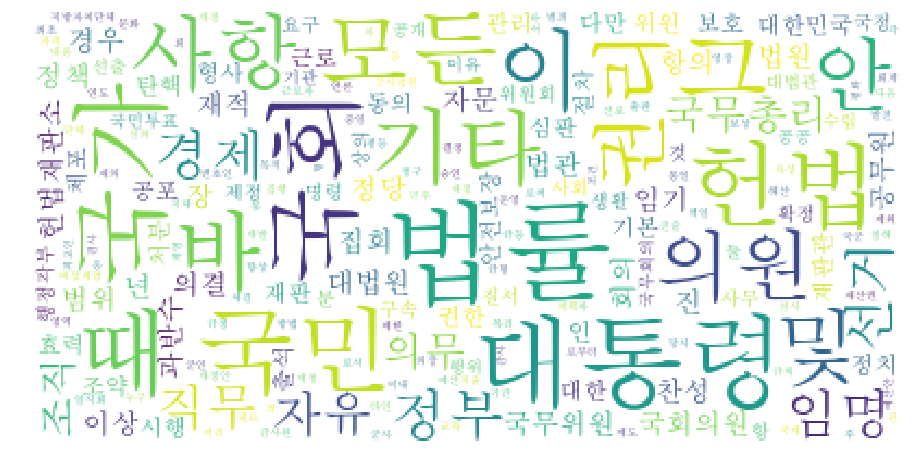

In [59]:
data = ko.vocab().most_common(500)
tmp_data = dict(data)

wordcloud = WordCloud(font_path = "C:/Windows/Fonts/AppleMyungjo.ttf", 
                     relative_scaling = 0.2,
                     background_color = 'white',
                     ).generate_from_frequencies(tmp_data)
plt.figure(figsize = (16, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [60]:
import numpy as np
from PIL import Image   

korea_coloring = np.array(Image.open("C:/Users/Kihong/2018_정당학회/korea_mask.jpg"))
from wordcloud import ImageColorGenerator 
image_colors = ImageColorGenerator(korea_coloring)

### 이미지 출처: https://www.pinterest.co.kr/pin/514395588671378068/

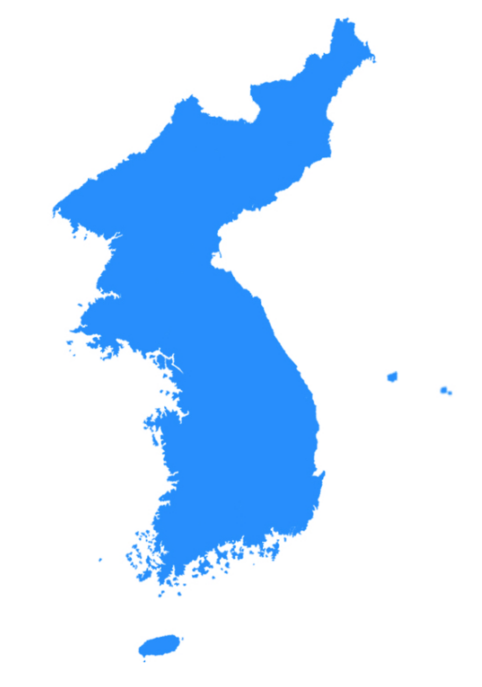

In [61]:
plt.figure(figsize=(12, 12))
plt.imshow(korea_coloring, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

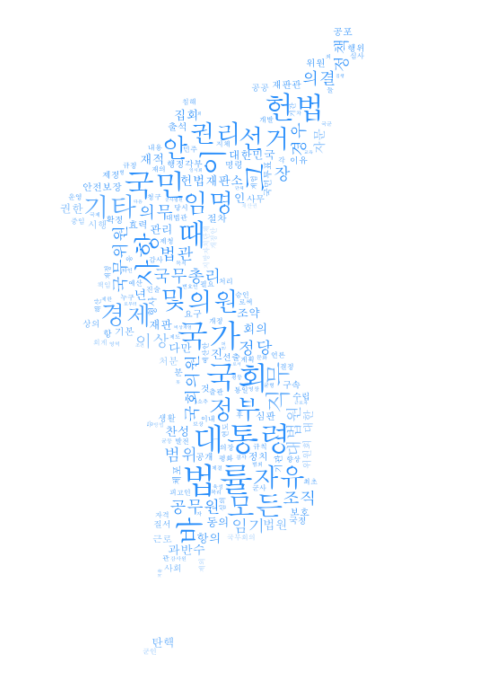

In [63]:
wordcloud = WordCloud(font_path ="C:/Windows/Fonts/AppleMyungjo.ttf", 
                     relative_scaling=0.2, mask=korea_coloring,
                      background_color='white', 
                      min_font_size=1, max_font_size=40).generate_from_frequencies(tmp_data)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## 의미망 분석

In [65]:
import networkx as nx

In [66]:
g = nx.Graph()

# NODES
g.add_node(1)
g.add_node(2)
g.add_nodes_from([3, 4, 5, "six", "hello"])
g.node[1]['type']='number'

EdgeDataView([(1, 2, {'weight': 2.3}), (2, 3, {}), (3, 5, {}), (5, 'six', {})])

In [68]:
print(g.nodes())
print(g.node[1])
print(g.node[2])
print(g.nodes(data=True))
print(len(g))

[1, 2, 3, 4, 5, 'six', 'hello']
{'type': 'number'}
{}
[(1, {'type': 'number'}), (2, {}), (3, {}), (4, {}), (5, {}), ('six', {}), ('hello', {})]
7


In [69]:
# EDGES
g.add_edge(1, 2)
g.add_edges_from([(2, 3), (3, 5), (5, 'six')])
g[1][2]['weight'] = 2.3

In [70]:
print(g.edges())
print(g.edges(data=True))

[(1, 2), (2, 3), (3, 5), (5, 'six')]
[(1, 2, {'weight': 2.3}), (2, 3, {}), (3, 5, {}), (5, 'six', {})]


In [71]:
import networkx as nx
import matplotlib.pyplot as plt

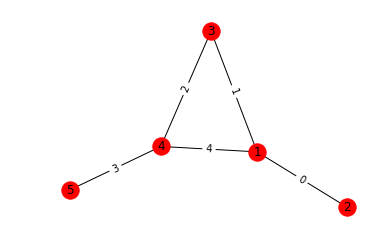

In [80]:
g2 = nx.Graph()

paths =[(1, 2), (1, 3), (3, 4), (4, 5), (4, 1)]
for p in paths:
    g2.add_edge(p[0], p[1])

pos = nx.spring_layout(g2)
nx.draw_networkx_nodes(g2, pos)
nx.draw_networkx_edges(g2, pos)

nx.draw_networkx_labels(g2, pos)  # 노드에 레이블을 더하라. Draw node labels on the graph G.

edgeLabels = {pair: x for x, pair in enumerate(paths)}
# edge_labels= 생성. edge_labels는 사전형 자료 {키 : 값}
# enumerate를 사용해서 paths 리스트의 쌍을 하나씩 부름
# 위치(index)를 x에 주고, 이에 해당하는 쌍을 pair에 줌
# 이후, 사전형 자료에 해당하는 {키 : 값}으로 {pair: x}로 반환함
nx.draw_networkx_edge_labels(g2, pos, edge_labels=edgeLabels)  # 관계(edge)에 레이블을 더하라

# Show or save your graph to disk
plt.savefig('network_eg01.png')
plt.axis('off')
plt.show()

In [82]:
# 중심성
deegree_cent = nx.degree_centrality(g2)
print(degree_cent)
bw_cent = nx.betweenness_centrality(g2)
print(bw_cent)
close_cent = nx.closeness_centrality(g2)
print(close_cent)

{1: 0.75, 2: 0.25, 3: 0.5, 4: 0.75, 5: 0.25}
{1: 0.5, 2: 0.0, 3: 0.0, 4: 0.5, 5: 0.0}
{1: 0.8, 2: 0.5, 3: 0.6666666666666666, 4: 0.8, 5: 0.5}


In [83]:
from operator import itemgetter

degree_cent = nx.degree_centrality(g2)
degree_sorted = sorted(degree_cent.items(), key=itemgetter(1), reverse=True)
print(degree_sorted[0:3])

[(1, 0.75), (4, 0.75), (3, 0.5)]


## 의미망 분석

In [5]:
import pandas as pd
from collections import Counter 
from konlpy.tag import Twitter

#### c.f. pandas 호출에 문제가 발생하면, 
    Anaconda Prompt 열고
    pip install --upgrade pandas 

In [6]:
df = pd.read_csv("korea_TwitterSearch_2018-07-11.csv", sep="\t", header=0,  index_col=False)

In [7]:
df.shape

(296, 3)

    The dataframe df is a 93 x 3 table, which means there are 93 rows, or records, and 3 columns, or fields.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 3 columns):
tweet_time    296 non-null object
twitter_id    296 non-null int64
tweet_text    296 non-null object
dtypes: int64(1), object(2)
memory usage: 7.0+ KB


In [9]:
df.columns

Index(['tweet_time', 'twitter_id', 'tweet_text'], dtype='object')

In [10]:
df.head()

,tweet_time,twitter_id,tweet_text
0,2018-07-11,596309294,"RT @m1SBIHp4gxVB0nq: @leejongsul78 골프치러 가는게지, ..."
1,2018-07-11,2994151164,RT @khk1222k: 한국은 종교의 자유가 있는 나라라고들 이야기 한다. 하지만...
2,2018-07-11,952429715658219520,RT @Hegori_cm: 예상외로 '한남(한국남자)'라는 표현이 되게 여성들 사이...
3,2018-07-11,4195088418,"RT @Mylife_KTV: #문재인 #대통령 ""국민과 소통하는 #모디 총리님께 경..."
4,2018-07-11,3280089805,자퇴하던가 1년 휴학햐서 해외에 있다가 해외에서 어느나라가 더 마음에 드는지 결정하...


In [ ]:
t = Twitter()
df['tags'] = df.tweet_text.apply(lambda x: t.nouns(x) )

In [23]:
counter = Counter()

for tags in df.tweet_text:
    
    ###################################################################
    # Use a set to remove duplicate words.
    # This enables us to count every term in a tweet as just 1 
    # even though they appear multiple times in the same tweet. 
    ###################################################################
    
    word_set = set()
    
    for item in tags:
        word = item[0].lower()
        word_set.add(word)
            
    counter.update(word_set)

In [24]:
counter

Counter({' ': 296,
         '!': 21,
         '"': 30,
         '#': 47,
         '%': 3,
         '&': 10,
         "'": 47,
         '(': 37,
         ')': 39,
         '+': 11,
         ',': 77,
         '-': 10,
         '.': 206,
         '/': 111,
         '0': 77,
         '1': 103,
         '2': 42,
         '3': 64,
         '4': 46,
         '5': 41,
         '6': 45,
         '7': 51,
         '8': 32,
         '9': 29,
         ':': 277,
         ';': 11,
         '=': 2,
         '?': 33,
         '@': 268,
         '[': 8,
         ']': 8,
         '^': 2,
         '_': 126,
         'a': 154,
         'b': 93,
         'c': 151,
         'd': 80,
         'e': 149,
         'f': 70,
         'g': 102,
         'h': 166,
         'i': 180,
         'j': 55,
         'k': 80,
         'l': 100,
         'm': 113,
         'n': 182,
         'o': 209,
         'p': 143,
         'q': 40,
         'r': 270,
         's': 160,
         't': 277,
         'u': 83,
         'v'